### Q1

In [8]:
import numpy as np

A = np.asmatrix([2, 3, 9, 1])
At = A.transpose()
print(At)

#Translation Matrix
TransMatrix = np.asmatrix([8, 0, 5, 1])
TransMatrix = TransMatrix.transpose()
print(TransMatrix)

#Scaling Matrix
ScaleMatrix = np.identity(3)
ScaleMatrix[0:0] = 2
ScaleMatrix[1:1] = 2

z= np.asmatrix([0,0,0])
print(z)

#Transformation Matrix
H = np.concatenate((ScaleMatrix, z), axis=0)
H = np.concatenate((H ,TransMatrix), axis=1)
print(H)

TransformedMatrix = np.matmul(H, At)
print(TransformedMatrix)

[[2]
 [3]
 [9]
 [1]]
[[8]
 [0]
 [5]
 [1]]
[[0 0 0]]
[[1. 0. 0. 8.]
 [0. 1. 0. 0.]
 [0. 0. 1. 5.]
 [0. 0. 0. 1.]]
[[10.]
 [ 3.]
 [14.]
 [ 1.]]


### Q2

In [29]:
M = np.asmatrix([[-2872.0, 1744.3, -138.7, 77270.0],
     [-273.9, -174.8, -3287.5, 94116.0],
     [-0.7380, -0.6480, -0.1883, 75.633]])
print(M)

#M = Hh
# Getting H from M
H = np.delete(M, 3, axis=1)
print(H)

# H = KR
# QR Decomposition of inv(H)  = transpose(R)*inv(K)
#Decomposition
q, r = np.linalg.qr(np.linalg.inv(H))

R = q.T
print(R)

#Normalisation of K
K = np.linalg.inv(r)

K33 = K[2,2]
print(K33)
K = K*(1/K33)
print(K)

#R(z, pi)
kappa = np.radians(180)
c_z, s_z = np.cos(kappa), np.sin(kappa)
R_z = np.asmatrix(((c_z, -s_z, 0), (s_z, c_z, 0), (0, 0, 1)))
print(R_z)

K = np.matmul(K, R_z)
R = np.matmul(R_z, R)
print(K)
print(R)

#Finding translational matrix
H = np.matmul(K,R)
print(H)

h = M[:,-1]
print(h)

t = np.matmul(np.linalg.inv(K), h)
print(t)

[[-2.8720e+03  1.7443e+03 -1.3870e+02  7.7270e+04]
 [-2.7390e+02 -1.7480e+02 -3.2875e+03  9.4116e+04]
 [-7.3800e-01 -6.4800e-01 -1.8830e-01  7.5633e+01]]
[[-2.8720e+03  1.7443e+03 -1.3870e+02]
 [-2.7390e+02 -1.7480e+02 -3.2875e+03]
 [-7.3800e-01 -6.4800e-01 -1.8830e-01]]
[[-0.66192563  0.74941331  0.01530159]
 [-0.13119877 -0.13593284  0.98199244]
 [ 0.7379982   0.64799842  0.18829954]]
-1.0000024449970117
[[-3.20612190e+03 -3.49287002e+00  1.01534184e+03]
 [ 0.00000000e+00  3.16859598e+03  9.34440281e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
[[ 3.20612190e+03  3.49287002e+00  1.01534184e+03]
 [ 3.88041093e-13 -3.16859598e+03  9.34440281e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.66192563 -0.74941331 -0.01530159]
 [ 0.13119877  0.13593284 -0.98199244]
 [ 0.7379982   0.64799842  0.18829954]]
[[ 2.87199298e+03 -

### Q3

In [33]:
import skimage.io
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image = cv2.imread('baboon.tiff')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

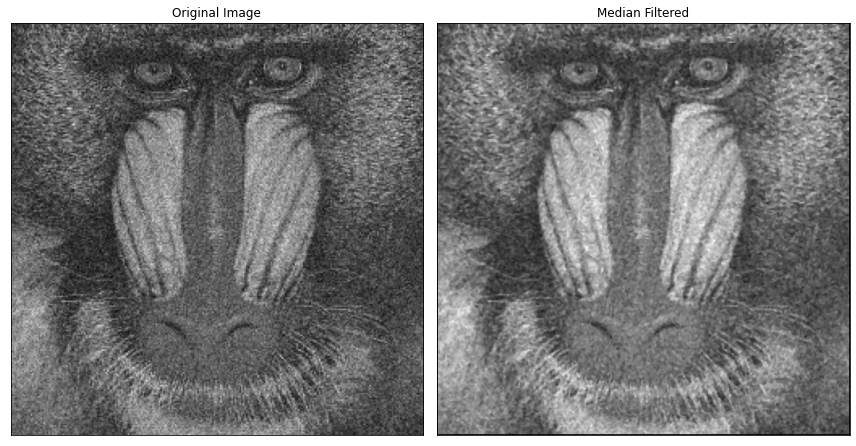

In [46]:
# Median Spatial Domain Filtering
#as we can see salt and pepper noise
 
import cv2

m, n = gray.shape

img_new = np.zeros([m, n])

for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [gray[i-1, j-1],
               gray[i-1, j],
               gray[i-1, j + 1],
               gray[i, j-1],
               gray[i, j],
               gray[i, j + 1],
               gray[i + 1, j-1],
               gray[i + 1, j],
               gray[i + 1, j + 1]]
         
        temp = sorted(temp)
        img_new[i, j]= temp[4]
        
img_new = img_new.astype(np.uint8)
cv2.imwrite('median_filtered_baboon.png', img_new)

img_baboon = cv2.imread('median_filtered_baboon.png',)
gray_baboon = cv2.cvtColor(img_baboon, cv2.COLOR_BGR2GRAY)

#Display graphics
titles = ['Original Image', 'Median Filtered']
images = [gray, gray_baboon]
plt.figure(figsize=(12,12))

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()

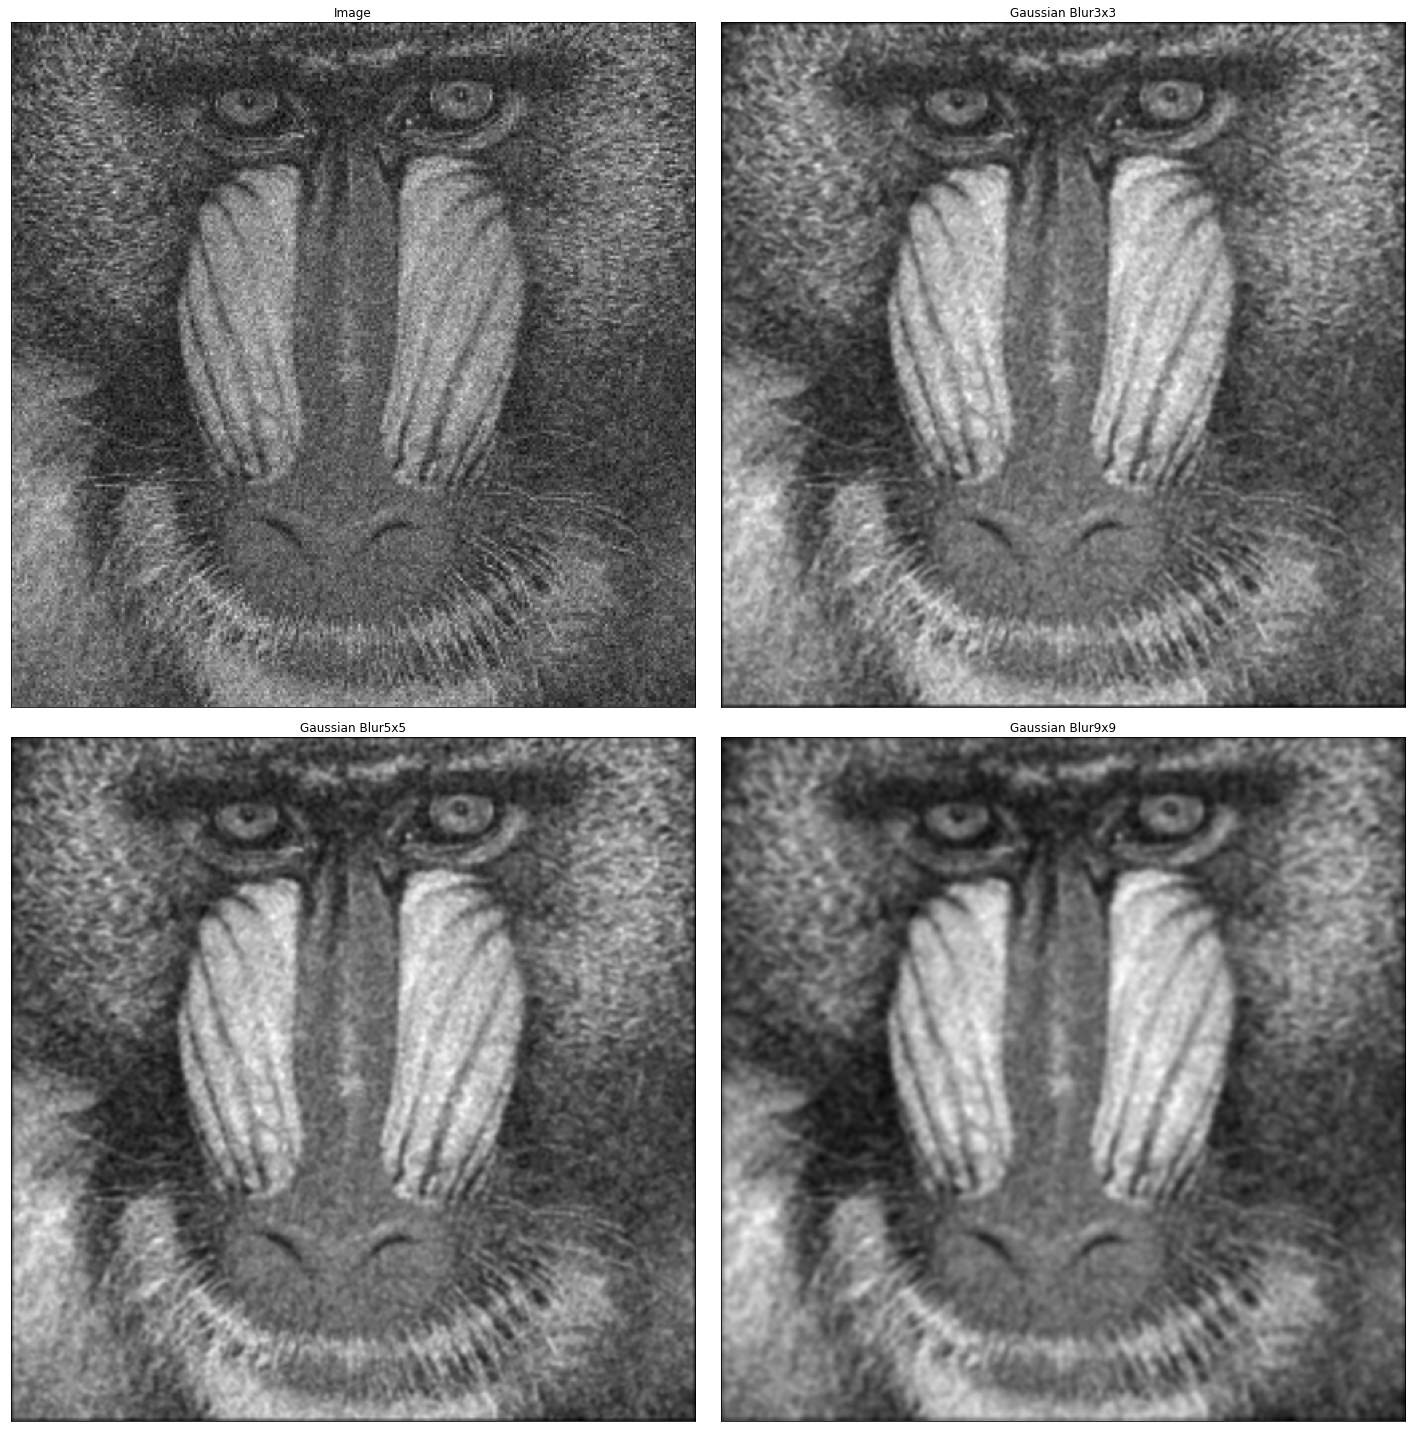

In [49]:
# Choosing appropriate smoothening kernel

#Gaussian blurring
gaussian_blur1 = cv2.GaussianBlur(gray_baboon,(3, 3), 0)
gaussian_blur2 = cv2.GaussianBlur(gray_baboon,(5, 5), 0)
gaussian_blur3 = cv2.GaussianBlur(gray_baboon,(9, 9), 0) 

# Display graphics
titles = ['Image','Gaussian Blur3x3', 'Gaussian Blur5x5', 'Gaussian Blur9x9']
images = [gray, gaussian_blur1, gaussian_blur2, gaussian_blur3]

plt.figure(figsize=(20, 20))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()   
plt.show()

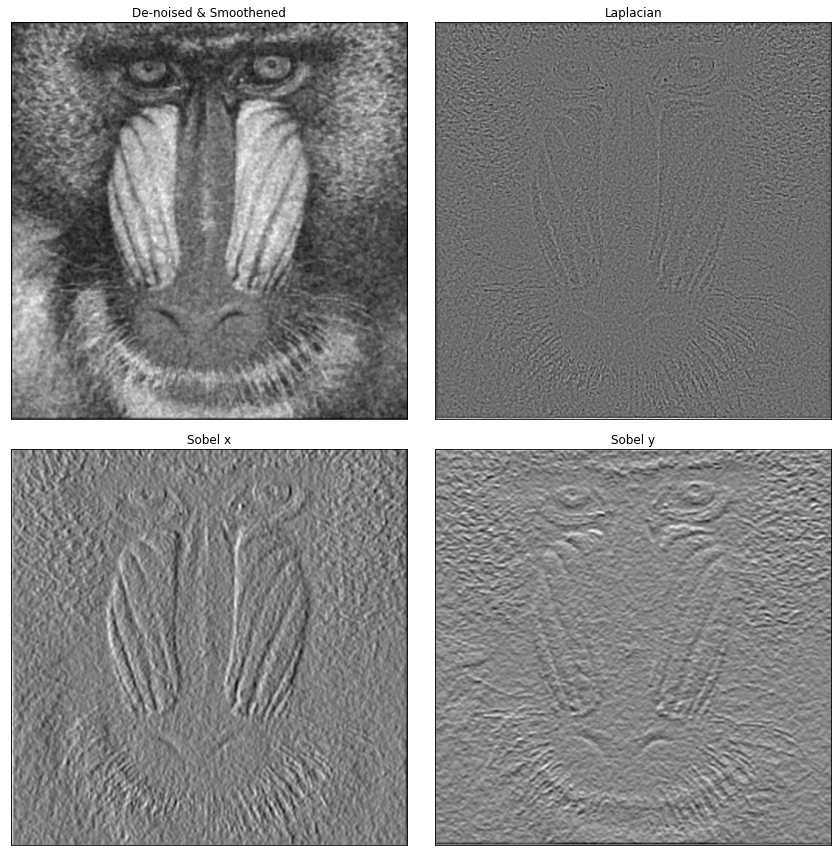

In [50]:
# 3*3 Guassian gives best result

g_img_baboon = cv2.GaussianBlur(gray_baboon, (3, 3), 0)

#Choosing Derivative
laplacian = cv2.Laplacian(g_img_baboon, cv2.CV_64F)

sobelx = cv2.Sobel(g_img_baboon, cv2.CV_64F, 1, 0, ksize=5)  
sobely = cv2.Sobel(g_img_baboon, cv2.CV_64F, 0, 1, ksize=5)

#Display graphics
titles = ['De-noised & Smoothened',"Laplacian", "Sobel x", "Sobel y"]
images = [g_img_baboon, laplacian, sobelx, sobely]
plt.figure(figsize=(12,12))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()

<Figure size 1152x1152 with 0 Axes>

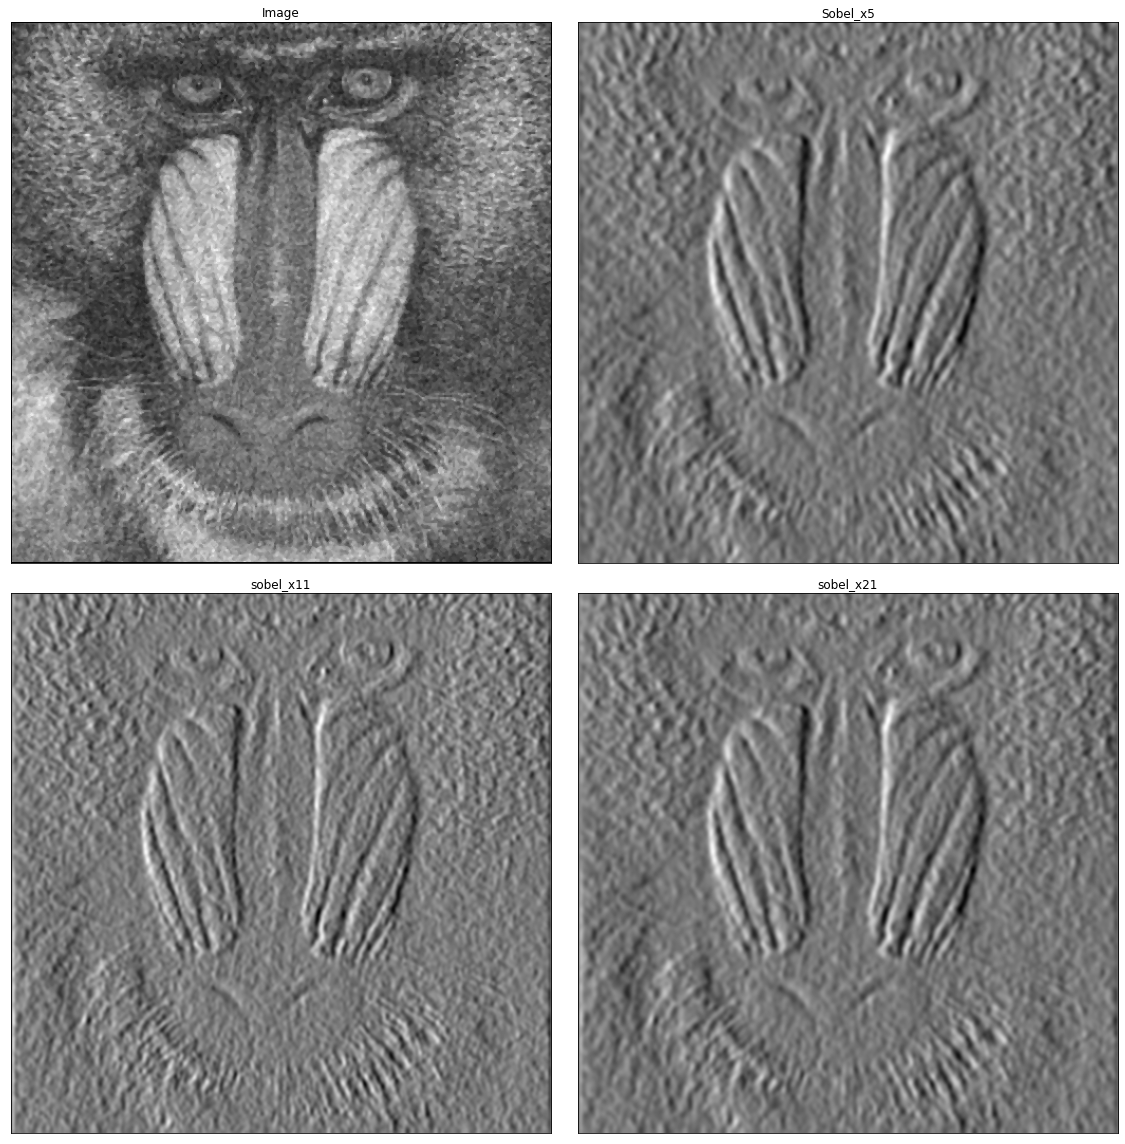

In [62]:
#Sobel Edge Detection in x direction gives best result

sobel_x5 = cv2.Sobel(src=g_img_baboon, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobel_x11 = cv2.Sobel(src=g_img_baboon, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=11)
sobel_x21 = cv2.Sobel(src=g_img_baboon, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=21)

plt.figure(figsize=(16, 16))

# Display graphics
titles = ['Image','Sobel_x5', 'sobel_x11', 'sobel_x21']
images = [gray_baboon, sobel_x5, sobel_x11, sobel_x21]

plt.figure(figsize=(16, 16))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()   
plt.show()

In [70]:
sx = ndimage.sobel(sobel_x11,axis=0,mode='constant')

sobel_y11 = cv2.Sobel(g_img_baboon, cv2.CV_64F, 0, 1, ksize=5)
sy = ndimage.sobel(sobel_y11,axis=0,mode='constant')

print(sx)
print(sy)

sobel=np.hypot(sx,sy)
plt.show()

[[ 1014166.  3459251.  5189234. ... -8339555. -6731580. -2112344.]
 [  243154.   769681.   925058. ... -1659784. -1224995.  -370571.]
 [  425289.  1344417.  1597764. ... -2747522. -1865131.  -546094.]
 ...
 [ -641403. -2141859. -3024468. ...  1282149.  1113282.   358642.]
 [ -449781. -1502639. -2128344. ...   702727.   690296.   231370.]
 [-2221651. -7139021. -9304131. ...  6120182.  4712434.  1467367.]]
[[ 2174.  3158.  3592. ...  5515.  4727.  3184.]
 [ 2326.  3363.  3777. ...  4055.  3353.  2207.]
 [ -194.  -312.  -434. ... -5324. -4874. -3407.]
 ...
 [-3328. -4702. -5077. ... -4143. -3942. -2805.]
 [ 2645.  4046.  4952. ...  5104.  4657.  3246.]
 [ 3712.  5471.  6339. ...  5717.  5240.  3663.]]


[[0.00000000e+00 5.56606600e+06 1.26058400e+06 ... 3.53581400e+06
  9.75306800e+06 0.00000000e+00]
 [3.15200000e+03 5.84943997e+06 1.13259430e+06 ... 3.58488029e+06
  1.02369215e+07 3.01800000e+03]
 [2.68000000e+02 6.62665101e+06 7.64100123e+05 ... 3.52449802e+06
  1.14937180e+07 4.61000000e+03]
 ...
 [4.49200000e+03 1.24916099e+07 2.06566024e+06 ... 1.99659730e+06
  7.83771499e+06 3.78600000e+03]
 [3.62200000e+03 1.10294797e+07 2.11184381e+06 ... 1.55434538e+06
  7.21416150e+06 4.39600000e+03]
 [0.00000000e+00 1.04264020e+07 2.13446600e+06 ... 1.33921200e+06
  6.98660400e+06 0.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.00000000e+01 3.29408829e-02 1.91071561e-01 ... 1.79935190e+02
  1.87666528e-02 9.00000000e+01]
 [9.00000000e+01 1.79997302e+02 1.79967457e+02 ... 8.65493027e-02
  1.79975703e+02 9.00000000e+01]
 ...
 [9.00000000e+01 1.79978433e+02 1.40822271e-01 ... 1.18890567e-01
  1.79971183e+02 9.00000000e+01]

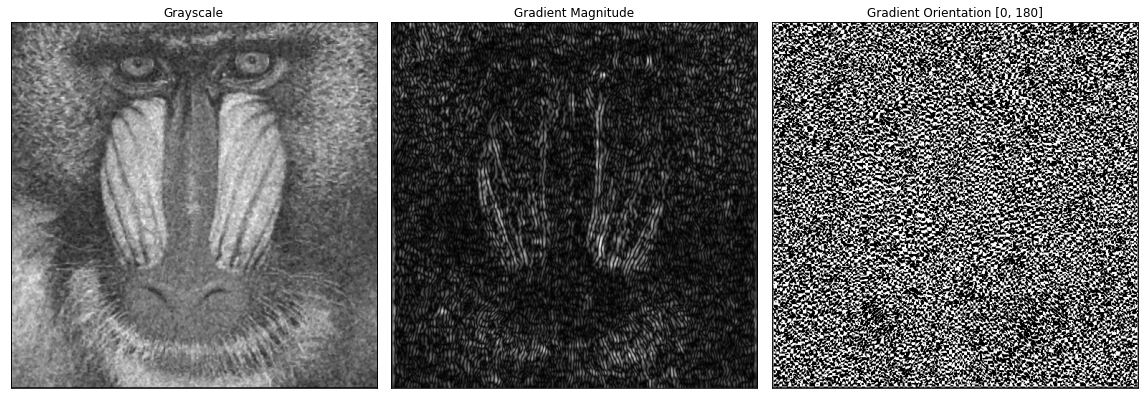

In [68]:
gX = cv2.Sobel(sobel_x11, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(sobel_y11 , cv2.CV_64F, 0, 1)

magnitude = np.sqrt((gX ** 2) + (gY ** 2))
print(magnitude)

orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180
print(orientation)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))

axes[0].imshow(gray_baboon, "gray")
axes[1].imshow(magnitude, "gray")
axes[2].imshow(orientation, "gray")

axes[0].set_title("Grayscale")
axes[1].set_title("Gradient Magnitude")
axes[2].set_title("Gradient Orientation [0, 180]")

for i in range(0, 3):
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

plt.tight_layout()
plt.show()